##KELOMPOK 7 SUBASIC
#APLIKASI PERFORMA TUBUH


#Membaca file CSV bernama bodyPerformance.csv dan menyimpannya dalam variabel df (DataFrame).

DataFrame: Struktur data dua dimensi (seperti tabel) yang disediakan oleh pandas, digunakan untuk menyimpan data dalam format baris dan kolom.

In [ ]:
df = pd.read_csv('bodyPerformance.csv')

#Mengimpor pustaka pandas, yang digunakan untuk analisis data dan manipulasi data dalam Python.

pd: Alias untuk pustaka pandas agar lebih mudah digunakan.


In [ ]:
import pandas as pd

#Menampilkan lima baris pertama dari DataFrame df.

Detail:
  - head(n) adalah metode bawaan pandas untuk melihat n baris pertama dari data. Jika nilai n tidak diberikan, maka secara default akan menampilkan 5 baris pertama.
  - Ini berguna untuk memeriksa sekilas struktur data, nama kolom, tipe data, dan beberapa nilai awal.

  Dataset ini memuat informasi tentang performa tubuh berdasarkan berbagai atribut fisiologis dan fisik, seperti **usia**, **jenis kelamin**, **tinggi badan**, **berat badan**, **persentase lemak tubuh**, **tekanan darah**, dan **kemampuan fisik** (misalnya kekuatan genggaman, fleksibilitas, sit-up, dan lompat jauh). Data ini dikategorikan ke dalam **kelas performa tubuh** (class), seperti A (sangat baik), B (baik), C (cukup baik) dan D (kurang baik) . Dataset cocok untuk analisis kebugaran tubuh dan membangun model prediktif untuk menilai tingkat kebugaran seseorang.

In [ ]:
df.head(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


#Mengecek missing value

1. df.isnull(): Menghasilkan DataFrame boolean dengan nilai True jika ada nilai yang kosong (null/NaN) di dalam dataset, dan False jika sebaliknya.
2. .sum(): Menjumlahkan nilai True (yang mewakili missing values) untuk setiap kolom. Nilai True dihitung sebagai 1, sehingga hasil akhirnya menunjukkan jumlah missing values di tiap kolom.

Hasil:

Semua kolom (age, gender, height_cm, dll.) memiliki jumlah missing values = 0. Ini berarti dataset tidak memiliki data yang kosong atau hilang, sehingga aman untuk digunakan tanpa perlu penanganan khusus seperti imputasi (mengisi nilai kosong) atau penghapusan data.

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
age,0
gender,0
height_cm,0
weight_kg,0
body fat_%,0
diastolic,0
systolic,0
gripForce,0
sit and bend forward_cm,0
sit-ups counts,0


#Mengelompokkan kolom numerik

1. numeric_columns: Variabel berbentuk list yang berisi nama-nama kolom yang dianggap memiliki tipe data numerik (integer atau float).

2. Tujuan:

  - Mengelompokkan kolom numerik memudahkan dalam analisis atau pemrosesan data lebih lanjut, seperti:
  - Statistik Deskriptif (mean, median, standard deviation, dll.)
  - Normalisasi atau Standardisasi data
  - Visualisasi Data (seperti histogram atau scatter plot)
  - Machine Learning (model sering memanfaatkan data numerik sebagai input)
3. Isi numeric_columns:

  - Kolom seperti age, height_cm, dan weight_kg adalah data numerik, mewakili variabel kuantitatif.
  - Kolom lainnya seperti body fat_% atau gripForce juga berisi nilai numerik yang relevan untuk analisis.
4. Kolom Tidak Termasuk:

  - Kolom gender dan class tidak dimasukkan karena:
  - gender: Berisi data kategorikal (M/F).
  - class: Berisi label kategori (A, B, C, D) yang digunakan untuk klasifikasi.

In [ ]:
numeric_columns = [
    'age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
    'systolic', 'gripForce', 'sit and bend forward_cm',
    'sit-ups counts', 'broad jump_cm'
]


#Menginisialisasikan scaler

1. Import Library
- MinMaxScaler: Digunakan untuk normalisasi data numerik ke dalam rentang tertentu (default 0-1).
- LabelEncoder: Digunakan untuk mengubah data kategorikal menjadi nilai numerik.
- pickle: Library Python untuk menyimpan model atau objek ke file agar dapat digunakan kembali.
2. Inisialisasi Scaler dan Encoder
- scaler: Objek untuk normalisasi data numerik menggunakan metode Min-Max scaling.
- label_encoder_gender & label_encoder_class: Objek untuk encoding kolom kategorikal (gender dan class) menjadi nilai numerik.
3. Normalisasi Kolom Numerik
- fit_transform:
  - fit: Mencari nilai minimum dan maksimum dari setiap kolom numerik.
  - transform: Mengubah nilai setiap kolom ke dalam rentang 0-1.
- df[numeric_columns]: Kolom numerik pada DataFrame diubah dengan nilai yang telah dinormalisasi.
4. Menyimpan Scaler dengan pickle
- pickle.dump: Menyimpan objek scaler ke file dengan nama minmax.pkl dalam mode write binary ('wb').
- Tujuan:
  - Agar scaler dapat digunakan di masa depan untuk data baru (misalnya saat proses prediksi), sehingga hasil normalisasi konsisten dengan data pelatihan.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import pickle
scaler = MinMaxScaler()
label_encoder_gender = LabelEncoder()
label_encoder_class = LabelEncoder()

# Normalize numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
pickle.dump(scaler, open('minmax.pkl', 'wb'))


#Encoding kolom kategori yaitu di gender dan class

Pada baris kode di bawah, dilakukan encoding terhadap dua kolom kategorikal, yaitu gender dan class, menggunakan LabelEncoder dari scikit-learn.

- df['gender'] = label_encoder_gender.fit_transform(df['gender']): Di sini, kolom gender, yang berisi kategori teks seperti 'M' (pria) dan 'F' (wanita), diubah menjadi representasi numerik. Fungsi fit_transform pertama-tama mempelajari label yang ada dalam kolom gender, kemudian mengubah setiap kategori menjadi angka (misalnya 'M' menjadi 1 dan 'F' menjadi 0).
  
- df['class'] = label_encoder_class.fit_transform(df['class']): Kolom class, yang berisi kategori kelas performa tubuh (misalnya 'A', 'B', 'C'), juga diubah menjadi representasi numerik. Fungsi yang sama digunakan untuk memetakan setiap kelas ke angka (misalnya 'A' menjadi 0, 'B' menjadi 1, dan 'C' menjadi 2).

Tujuan dari proses ini adalah untuk mengubah data kategorikal menjadi format numerik yang dapat diproses oleh algoritma machine learning, yang tidak dapat langsung menangani data berupa teks atau kategori.

In [ ]:
df['gender'] = label_encoder_gender.fit_transform(df['gender'])
df['class'] = label_encoder_class.fit_transform(df['class'])


In [ ]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,0.139535,1,0.687500,0.437746,0.242706,0.512164,0.646766,0.778723,0.182353,0.7500,0.716172,2
1,0.093023,1,0.581395,0.263864,0.168435,0.492958,0.626866,0.516312,0.173529,0.6625,0.755776,0
2,0.232558,1,0.793605,0.462433,0.226790,0.588988,0.756219,0.635461,0.155462,0.6125,0.597360,2
3,0.255814,1,0.719477,0.400716,0.204244,0.486556,0.731343,0.587234,0.168908,0.6625,0.722772,1
4,0.162791,1,0.709302,0.370304,0.187003,0.448143,0.631841,0.617021,0.218908,0.5625,0.716172,1


In [ ]:
# Periksa distribusi kelas
print(f'Distribusi kelas:\n{df["class"].value_counts()}')

Distribusi kelas:
class
2    3349
3    3349
0    3348
1    3347
Name: count, dtype: int64


# Splitting data ke dalam satu data training dan data testing

Pada kode tersebut, data dibagi menjadi dua set, yaitu training set dan testing set, menggunakan fungsi train_test_split dari scikit-learn. Pertama, fitur (X) dan target (y) didefinisikan dengan memisahkan kolom target class dari kolom fitur lainnya.

Kemudian, data tersebut dibagi dengan 80% untuk data training dan 20% untuk data testing (dengan parameter test_size=0.2). Proses pemisahan ini bertujuan untuk melatih model menggunakan data training dan menguji kinerja model menggunakan data testing yang terpisah, untuk memastikan model dapat menggeneralisasi hasil pada data yang belum pernah dilihat sebelumnya.

Parameter random_state=42 digunakan untuk memastikan bahwa pemisahan data dapat direproduksi pada eksekusi berikutnya. Akhirnya, dimensi (jumlah baris dan kolom) dari kedua set data tersebut ditampilkan untuk memastikan pembagian dilakukan dengan benar.

In [ ]:
from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
X = df.drop('class', axis=1)  # Drop the target column from features
y = df['class']  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Display the shape of the datasets
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (10714, 11) (10714,)
Testing set: (2679, 11) (2679,)


In [ ]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,0.139535,1,0.687500,0.437746,0.242706,0.512164,0.646766,0.778723,0.182353,0.7500,0.716172,2
1,0.093023,1,0.581395,0.263864,0.168435,0.492958,0.626866,0.516312,0.173529,0.6625,0.755776,0
2,0.232558,1,0.793605,0.462433,0.226790,0.588988,0.756219,0.635461,0.155462,0.6125,0.597360,2
3,0.255814,1,0.719477,0.400716,0.204244,0.486556,0.731343,0.587234,0.168908,0.6625,0.722772,1
4,0.162791,1,0.709302,0.370304,0.187003,0.448143,0.631841,0.617021,0.218908,0.5625,0.716172,1


In [ ]:
df['class'].unique()

array([2, 0, 1, 3])

#objek MinMaxScaler dari scikit-learn untuk melakukan normalisasi pada data fitur

 MinMaxScaler mengubah nilai-nilai dalam data fitur agar berada dalam rentang antara 0 dan 1, dengan cara mengurangi nilai minimum dan membaginya dengan rentang (selisih antara nilai maksimum dan minimum). Pertama, pada X_train, fungsi fit_transform digunakan untuk menghitung parameter normalisasi (nilai minimum dan maksimum) pada data training dan mengubah data training sesuai dengan parameter tersebut.

 Kemudian, pada X_test, fungsi transform digunakan untuk menerapkan transformasi yang sama (menggunakan parameter yang dihitung dari X_train) ke data testing, tanpa menghitung ulang parameter normalisasi. Tujuannya adalah untuk memastikan data testing dan training berada pada skala yang sama, sehingga model dapat bekerja dengan lebih baik.

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train_test_split dari scikit-learn digunakan untuk membagi dataset menjadi data pelatihan dan pengujian
 MinMaxScaler digunakan untuk normalisasi fitur numerik, sementara LabelEncoder digunakan untuk mengonversi label kategori menjadi format numerik. tensorflow dan modul terkaitnya seperti Sequential, Dense, Dropout, dan Input digunakan untuk membangun dan melatih model jaringan saraf (neural network). to_categorical digunakan untuk menerapkan one-hot encoding pada label target, yang penting dalam klasifikasi.

  Pustaka matplotlib dan seaborn digunakan untuk visualisasi data dan hasil model, seperti confusion matrix, yang membantu dalam evaluasi kinerja model. Akhirnya, confusion_matrix dari scikit-learn digunakan untuk menghitung dan menampilkan confusion matrix sebagai alat evaluasi model klasifikasi.

In [ ]:
from sklearn.model_selection import train_test_split  # Untuk membagi data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder  # Untuk scaling dan encoding label
import numpy as np  # Untuk operasi array
import tensorflow as tf  # Untuk neural network
from tensorflow.keras.models import Sequential  # Untuk membuat model Keras
from tensorflow.keras.layers import Dense, Dropout, Input  # Layer yang digunakan dalam model
from tensorflow.keras.utils import to_categorical  # Untuk one-hot encoding
import matplotlib.pyplot as plt  # Untuk visualisasi plot
import seaborn as sns  # Untuk visualisasi confusion matrix
from sklearn.metrics import confusion_matrix  # Untuk evaluasi model


#Label target (y_train dan y_test) diubah menjadi format one-hot encoding menggunakan fungsi to_categorical dari TensorFlow
 One-hot encoding adalah teknik yang mengonversi label kategori menjadi vektor biner, di mana setiap kelas diwakili oleh kolom terpisah dengan nilai 1 di posisi kelas yang sesuai dan 0 di posisi lainnya. Argumen num_classes=4 menunjukkan jumlah kelas yang ada dalam dataset, yang harus disesuaikan dengan jumlah kelas target yang sebenarnya. Setelah proses ini, bentuk data target (y_train dan y_test) akan diperbarui, dan kode ini juga mencetak bentuk array target untuk pelatihan dan pengujian, serta menampilkan kelas unik yang ada dalam kolom class pada dataset.

In [ ]:
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=4)  # Gantilah 4 dengan jumlah kelas yang sesuai
y_test = to_categorical(y_test, num_classes=4)
print(y_train.shape)
print(y_test.shape)
print(df['class'].unique())  # Menampilkan kelas yang unik dalam data
 # Gantilah 4 dengan jumlah kelas yang sesuai


(10714, 4)
(2679, 4)
[2 0 1 3]


#Model neural network dibangun menggunakan Keras dengan API Sequential
 Pertama, layer input ditambahkan dengan Input(shape=(X_train.shape[1],)) yang disesuaikan dengan jumlah fitur pada data pelatihan. Kemudian, beberapa layer tersembunyi (hidden layers) ditambahkan menggunakan Dense dengan fungsi aktivasi ReLU ('relu'), yang sering digunakan untuk model feedforward karena kemampuannya menangani non-linearitas.

 Layer tersembunyi pertama memiliki 64 neuron, sedangkan layer kedua memiliki 128 neuron. Dropout 0.3 digunakan untuk regularisasi, yang membantu mengurangi overfitting dengan secara acak menonaktifkan 30% neuron pada setiap iterasi selama pelatihan. Layer tersembunyi ketiga memiliki 64 neuron lagi, dan layer output menggunakan 4 neuron dengan aktivasi softmax untuk menghasilkan probabilitas untuk masing-masing dari 4 kelas (output target) yang akan diprediksi oleh model.

In [ ]:
# Build the model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Input layer sesuai dengan jumlah fitur
model.add(Dense(64, activation='relu'))  # Hidden layer pertama
model.add(Dense(128, activation='relu'))  # Hidden layer kedua
model.add(Dropout(0.3))  # Dropout untuk regularisasi
model.add(Dense(64, activation='relu'))  # Hidden layer ketiga
model.add(Dense(4, activation='softmax'))  # Output layer (4 kelas)


#Menyusun Model
Model dikompilasi dengan optimizer Adam dan loss function categorical_crossentropy untuk klasifikasi multi-kelas, serta metrik akurasi untuk mengukur performa model.


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#Melatih Model

Model dilatih menggunakan data pelatihan X_train dan y_train selama 50 epoch dengan batch size 32, serta 20% data digunakan untuk validasi (validation_split=0.2).

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3599 - loss: 1.2964 - val_accuracy: 0.5315 - val_loss: 1.0465
Epoch 2/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5446 - loss: 0.9913 - val_accuracy: 0.5637 - val_loss: 0.9780
Epoch 3/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5638 - loss: 0.9633 - val_accuracy: 0.5688 - val_loss: 0.9696
Epoch 4/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5738 - loss: 0.9318 - val_accuracy: 0.5926 - val_loss: 0.8855
Epoch 5/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5991 - loss: 0.8908 - val_accuracy: 0.5833 - val_loss: 0.9134
Epoch 6/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6042 - loss: 0.8881 - val_accuracy: 0.6258 - val_loss: 0.8476
Epoch 7/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6194 - loss: 0.8491 - val_accuracy: 0.6407 - val_loss: 0.8253
Epoch 8/50
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6289 - loss: 0.8379 - val_accuracy: 0.

#Visualisasi Akurasi

Grafik akurasi selama pelatihan dan validasi dipetakan untuk menunjukkan performa model pada setiap epoch.

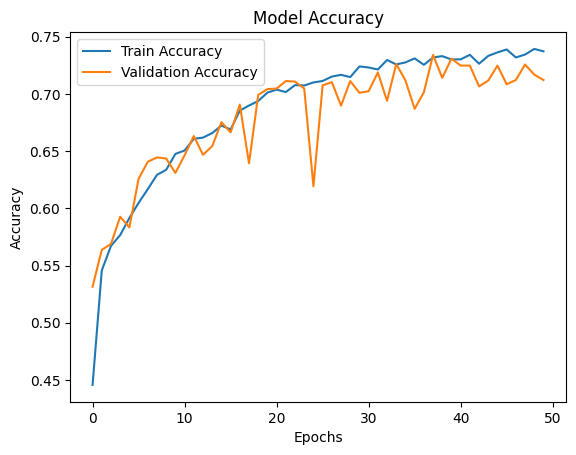

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Evaluasi Model

Model dievaluasi menggunakan data pengujian (X_test, y_test) untuk menghitung akurasi dan loss pada data tes.

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 0.73


#Prediksi dengan Model

Model melakukan prediksi pada data uji, dan hasil prediksi dibandingkan dengan label kelas yang sebenarnya untuk memverifikasi hasil.

In [ ]:
# Prediksi dengan model pada data pengujian
y_pred = model.predict(X_test)

# Ambil kelas yang diprediksi
y_pred_classes = np.argmax(y_pred, axis=1)

# Ambil kelas yang sebenarnya
y_test_classes = np.argmax(y_test, axis=1)

# Menampilkan prediksi dan kelas sebenarnya untuk beberapa data
print("Prediksi kelas: ", y_pred_classes[:10])  # Menampilkan 10 prediksi pertama
print("Kelas sebenarnya: ", y_test_classes[:10])  # Menampilkan 10 kelas sebenarnya

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Prediksi kelas:  [3 0 1 2 3 0 1 0 1 0]
Kelas sebenarnya:  [3 0 2 2 3 0 1 0 1 0]


#Matriks Kebingunguan

Matriks kebingunguan (confusion matrix) divisualisasikan untuk menunjukkan seberapa baik model mengklasifikasikan data dalam masing-masing kelas.

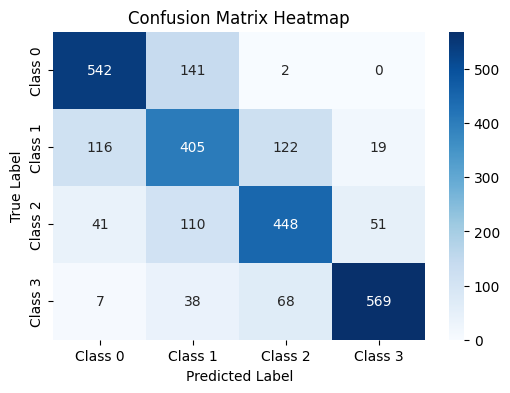

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Laporan Klasifikasi

Laporan klasifikasi ditampilkan untuk memberikan informasi lebih rinci tentang precision, recall, dan F1-score pada setiap kelas.

In [ ]:
from sklearn.metrics import classification_report

# Menghasilkan classification report
print(classification_report(y_test_classes, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3']))


              precision    recall  f1-score   support

     Class 0       0.77      0.79      0.78       685
     Class 1       0.58      0.61      0.60       662
     Class 2       0.70      0.69      0.69       650
     Class 3       0.89      0.83      0.86       682

    accuracy                           0.73      2679
   macro avg       0.74      0.73      0.73      2679
weighted avg       0.74      0.73      0.73      2679



#Plot Loss

Plot loss selama pelatihan dan validasi ditampilkan untuk memantau konvergensi model.

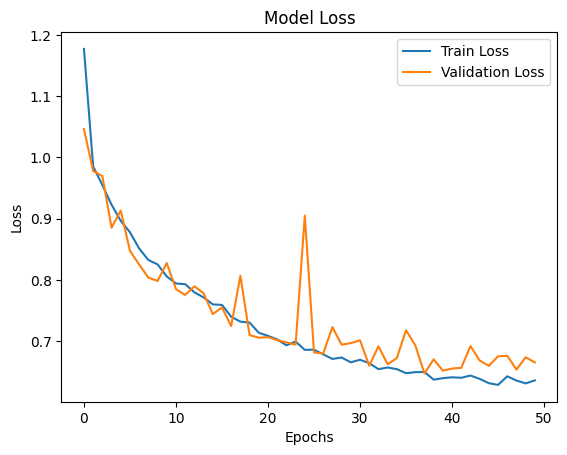

In [ ]:
# Plot loss selama training
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Menyimpan Model

Model disimpan dalam format .h5 untuk penggunaan lebih lanjut.

In [ ]:
model.save('model.h5')

#Konversi Model ke Format TensorFlow Lite

Model diubah ke format .tflite yang lebih ringan dan bisa digunakan pada perangkat mobile atau embedded systems, lalu disimpan ke file.

In [ ]:
import tensorflow as tf

# Memuat model .keras
model = tf.keras.models.load_model('model.h5')

# Mengonversi model ke format .tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Menyimpan model .tflite ke file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpp7s5oidn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 11), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  139845656003504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845656013888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845656054064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845656056000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845656067088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845656067792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845656064624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139845656202928: TensorSpec(shape=(), dtype=tf.resource, name=None)


#Menampilkan Data Awal

Data awal dari df ditampilkan untuk melihat struktur data.

In [ ]:
df.head(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,0.139535,1,0.687500,0.437746,0.242706,0.512164,0.646766,0.778723,0.182353,0.7500,0.716172,2
1,0.093023,1,0.581395,0.263864,0.168435,0.492958,0.626866,0.516312,0.173529,0.6625,0.755776,0
2,0.232558,1,0.793605,0.462433,0.226790,0.588988,0.756219,0.635461,0.155462,0.6125,0.597360,2
3,0.255814,1,0.719477,0.400716,0.204244,0.486556,0.731343,0.587234,0.168908,0.6625,0.722772,1
4,0.162791,1,0.709302,0.370304,0.187003,0.448143,0.631841,0.617021,0.218908,0.5625,0.716172,1
